Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Cleaning

In [2]:
df = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df['TotalCharges'] = (
    df['TotalCharges']
      .astype(str)
      .str.strip()
      .replace('', np.nan)
)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)

In [7]:
df_clean = df.drop('customerID', axis=1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Data Visualization

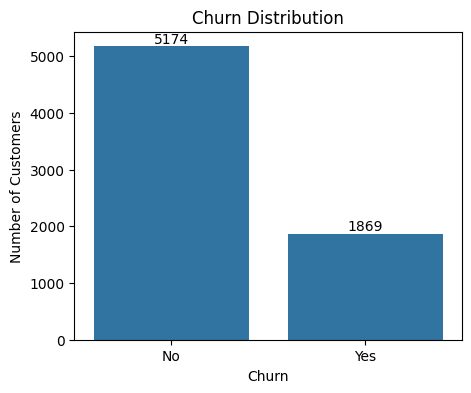

In [8]:
plt.figure(figsize=(5,4))
ax = sns.countplot(x='Churn', data=df)

plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

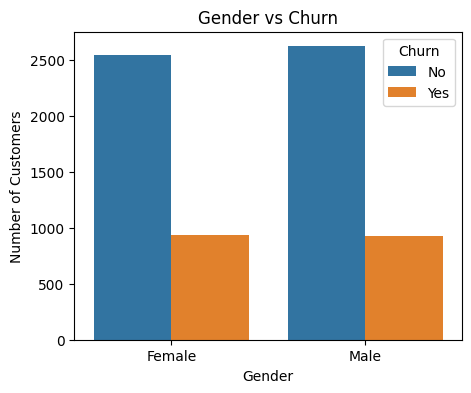

In [9]:
plt.figure(figsize=(5,4))
sns.countplot(x='gender', hue='Churn', data=df)

plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(title='Churn', labels=['No', 'Yes'])

plt.title('Gender vs Churn')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

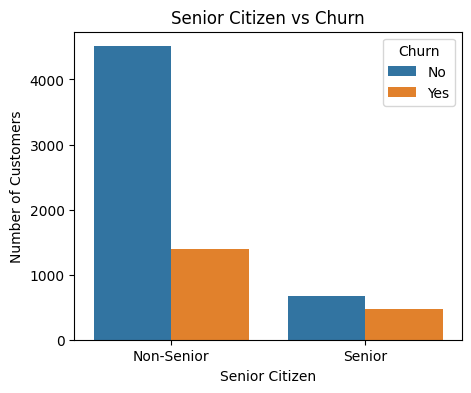

In [10]:
plt.figure(figsize=(5,4))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)

plt.xticks([0, 1], ['Non-Senior', 'Senior'])
plt.legend(title='Churn', labels=['No', 'Yes'])

plt.title('Senior Citizen vs Churn')
plt.xlabel('Senior Citizen')
plt.ylabel('Number of Customers')
plt.show()

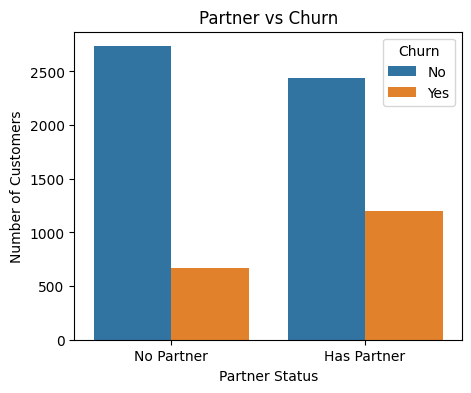

In [11]:
plt.figure(figsize=(5,4))
sns.countplot(x='Partner', hue='Churn', data=df)

plt.xticks([0, 1], ['No Partner', 'Has Partner'])
plt.legend(title='Churn', labels=['No', 'Yes'])

plt.title('Partner vs Churn')
plt.xlabel('Partner Status')
plt.ylabel('Number of Customers')
plt.show()

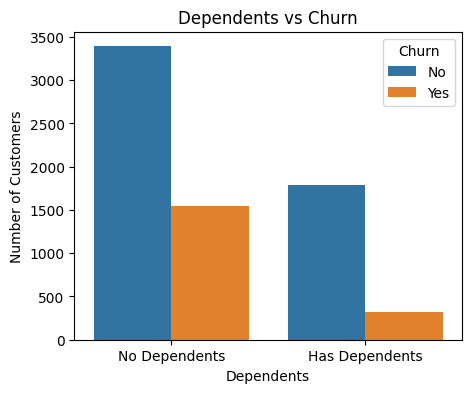

In [12]:
plt.figure(figsize=(5,4))
sns.countplot(x='Dependents', hue='Churn', data=df)

plt.xticks([0, 1], ['No Dependents', 'Has Dependents'])
plt.legend(title='Churn', labels=['No', 'Yes'])

plt.title('Dependents vs Churn')
plt.xlabel('Dependents')
plt.ylabel('Number of Customers')
plt.show()

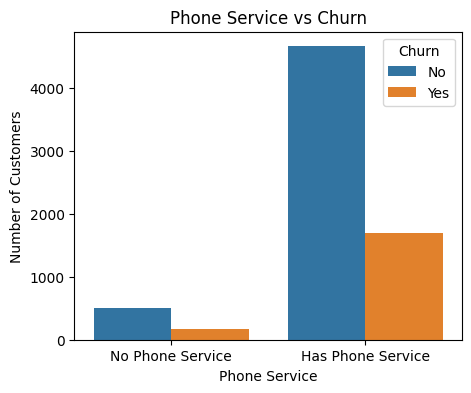

In [13]:
plt.figure(figsize=(5,4))
sns.countplot(x='PhoneService', hue='Churn', data=df)

plt.xticks([0, 1], ['No Phone Service', 'Has Phone Service'])
plt.legend(title='Churn', labels=['No', 'Yes'])

plt.title('Phone Service vs Churn')
plt.xlabel('Phone Service')
plt.ylabel('Number of Customers')
plt.show()

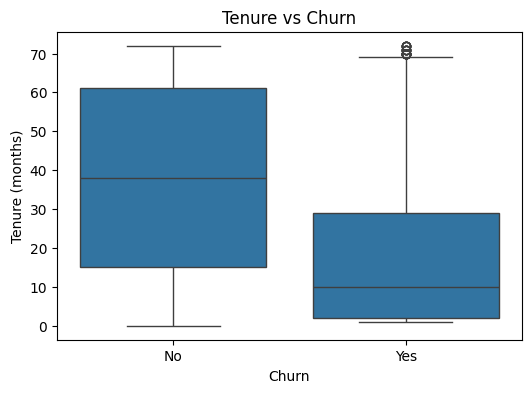

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='tenure', data=df)

plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (months)')
plt.show()

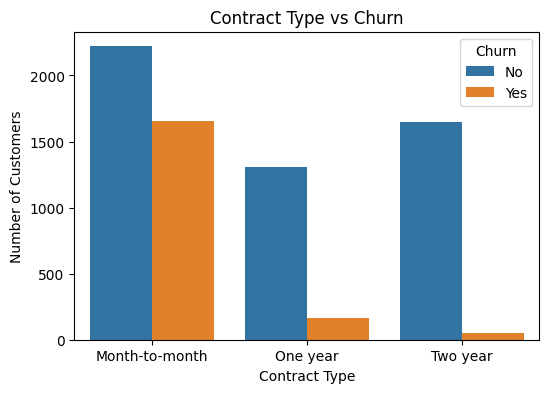

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df)

plt.legend(title='Churn', labels=['No', 'Yes'])

plt.title('Contract Type vs Churn')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')

plt.show()

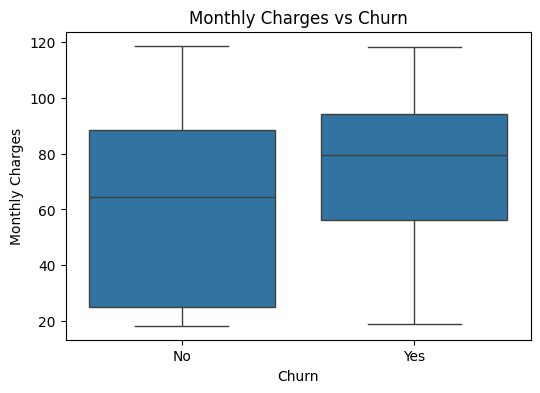

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.xticks([0,1], ['No', 'Yes'])
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

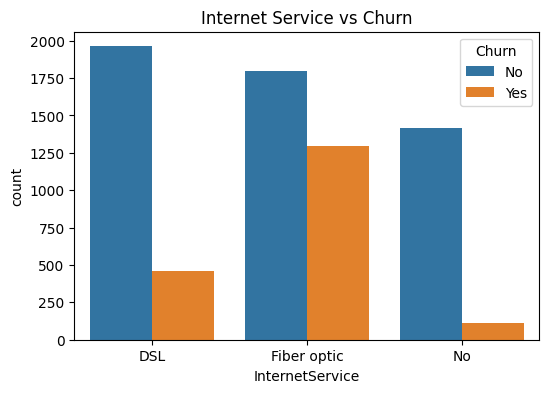

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.legend(title='Churn', labels=['No','Yes'])
plt.title('Internet Service vs Churn')
plt.show()

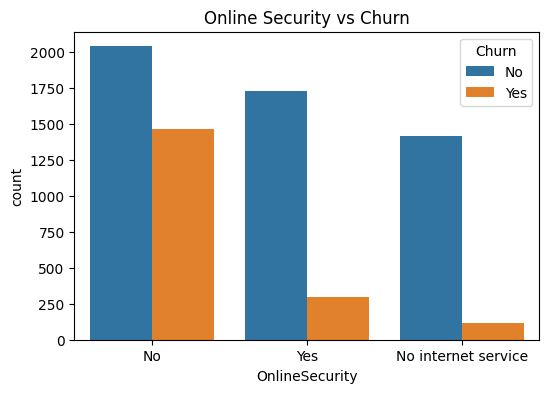

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.legend(title='Churn', labels=['No','Yes'])
plt.title('Online Security vs Churn')
plt.show()

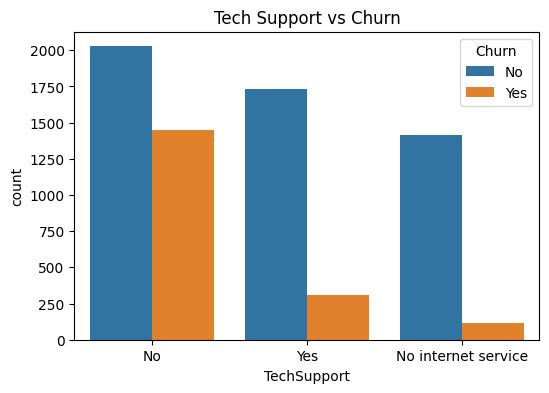

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.legend(title='Churn', labels=['No','Yes'])
plt.title('Tech Support vs Churn')
plt.show()

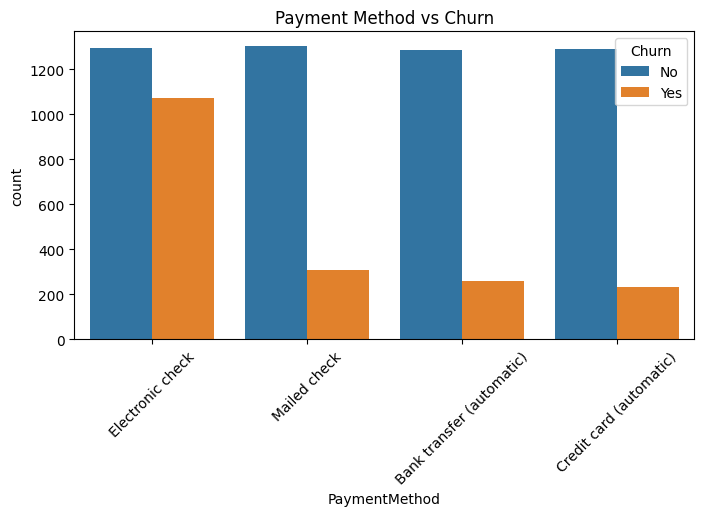

In [20]:
plt.figure(figsize=(8,4))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.legend(title='Churn', labels=['No','Yes'])
plt.xticks(rotation=45)
plt.title('Payment Method vs Churn')
plt.show()

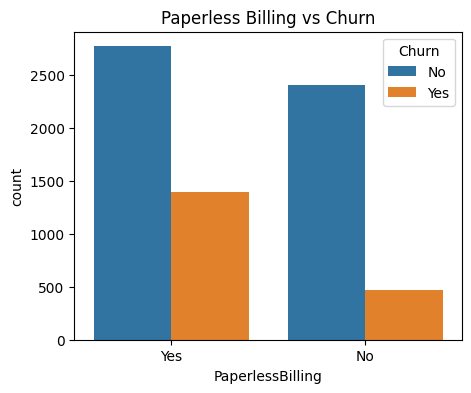

In [21]:
plt.figure(figsize=(5,4))
sns.countplot(x='PaperlessBilling', hue='Churn', data=df)
plt.legend(title='Churn', labels=['No','Yes'])
plt.title('Paperless Billing vs Churn')
plt.show()

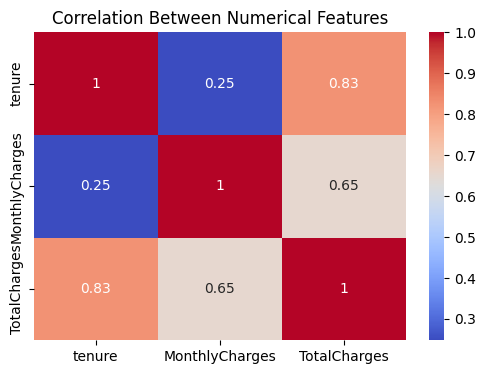

In [22]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Features')
plt.show()

# 📊 Customer Churn Analytics Summary (Decision-Focused)

## 1. Overall Churn Landscape
The dataset contains **5,174 non-churned customers** and **1,869 churned customers**, indicating a **moderately imbalanced distribution** where approximately **26.5% of customers churned**.  
This suggests that while the majority of customers remain, churn is a significant issue that requires **targeted retention strategies** rather than broad interventions.

---

## 2. Key Numerical Drivers of Churn

### 🔹 Tenure
Customers who churn tend to have **significantly shorter tenure** compared to retained customers.  
The majority of churn occurs during the **early stages of the customer lifecycle**, indicating that customers who fail to build long-term engagement are more likely to leave.

**Decision Insight:**  
- Early customer experience and onboarding quality are **critical leverage points** for churn prevention.

---

### 🔹 Monthly Charges
Churned customers generally incur **higher monthly charges**, indicating a **price-sensitivity effect** where customers perceive insufficient value relative to cost.

**Decision Insight:**  
- High-cost customers should be prioritized for **value reinforcement** (e.g., discounts, service bundles, or quality improvements).

---

### 🔹 Total Charges
Total charges are **strongly correlated with tenure**, confirming that long-term customers naturally accumulate higher total payments.  
However, total charges alone are **not a direct churn trigger**.

**Decision Insight:**  
- Churn risk is influenced more by **current cost burden** than historical spending.

---

## 3. Demographic Influence on Churn

### 🔹 Gender
Churn distribution between male and female customers is **nearly identical**, indicating that gender does not play a meaningful role in churn behavior.

**Decision Insight:**  
- Gender-based segmentation is **not effective** for churn mitigation strategies.

---

### 🔹 Senior Citizen Status
Senior citizens show a **notably higher churn rate (~40%)** compared to non-senior customers (**~25%**).

**Decision Insight:**  
- Senior customers may require **simplified plans, clearer communication, or specialized support** to reduce churn.

---

## 4. Household & Social Stability Factors

### 🔹 Partner Status
Customers **without partners** exhibit higher churn rates than those with partners.

---

### 🔹 Dependents
Customers **without dependents** show substantially higher churn (**~50%**), while customers with dependents have a much lower churn rate (**~15–20%**).

**Decision Insight:**  
- Customers with stronger household ties tend to be more stable.  
- Single or independent customers represent a **higher churn risk** and should be prioritized for retention efforts.

---

## 5. Service Subscription Impact

### 🔹 Phone Service
While customers **without phone service** show higher churn ratios, their population size is relatively small.  
Among customers **with phone service**, churn remains significant.

**Decision Insight:**  
- Phone service alone is **not a strong churn deterrent**; value comes from **bundled services**.

---

### 🔹 Internet Service Type
- **Fiber optic customers** exhibit the highest churn rate (**~75%**)  
- **DSL customers** show moderate churn  
- Customers **without internet service** rarely churn  

**Decision Insight:**  
- Fiber optic customers likely experience **unmet expectations or service quality issues** and represent the **highest-priority segment** for intervention.

---

## 6. Value-Added Services as Retention Anchors

### 🔹 Online Security
Customers **without online security** experience extremely high churn (**~75%**).

---

### 🔹 Tech Support
Customers **without technical support** show a similar high churn pattern.

**Decision Insight:**  
- Value-added services such as **online security and tech support** act as strong **retention anchors**.  
- Encouraging adoption of these services can significantly reduce churn risk.

---

## 7. Contractual Commitment Effects

### 🔹 Contract Type
Customers on **month-to-month contracts** account for the vast majority of churn cases (**~75%**),  
while customers on **one-year and two-year contracts** show very low churn rates.

**Decision Insight:**  
- Contract length is one of the **strongest predictors of churn**.  
- Incentivizing long-term contracts can dramatically improve retention.

---

## 8. Billing & Payment Behavior

### 🔹 Payment Method
Customers using **electronic checks** show a substantially higher churn rate (**~40%**) compared to other payment methods.

**Decision Insight:**  
- Electronic check users may experience **payment friction or lower commitment**, making them a high-risk churn segment.

---

### 🔹 Paperless Billing
Customers using **paperless billing** show higher churn (**~50%**) than those who do not (**~20%**).

**Decision Insight:**  
- Paperless billing may correlate with **digitally active but less loyal customers**, requiring more proactive engagement.

---

## 9. Strategic Churn Profile (Key Takeaway)

Customers most likely to churn typically exhibit the following characteristics:

- Short tenure  
- High monthly charges  
- Month-to-month contract  
- Fiber optic internet service  
- No online security or tech support  
- No dependents and no partner  
- Uses electronic check  
- Uses paperless billing  
- Senior citizen  

---

## 10. Business & Modeling Implications

### 📌 Business Strategy
- Focus retention efforts on **early-tenure, high-cost, month-to-month customers**
- Bundle **online security and tech support** as retention tools
- Improve **fiber optic service experience**
- Encourage migration to **long-term contracts**


Data Preprocessing

In [23]:
df_clean.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [24]:
categorical_cols = df_clean.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"Column: {col}")
    print(f'Total Unique Values: {df_clean[col].nunique()}')
    print(df_clean[col].unique())
    print("_" * 20)

Column: gender
Total Unique Values: 2
['Female' 'Male']
____________________
Column: Partner
Total Unique Values: 2
['Yes' 'No']
____________________
Column: Dependents
Total Unique Values: 2
['No' 'Yes']
____________________
Column: PhoneService
Total Unique Values: 2
['No' 'Yes']
____________________
Column: MultipleLines
Total Unique Values: 3
['No phone service' 'No' 'Yes']
____________________
Column: InternetService
Total Unique Values: 3
['DSL' 'Fiber optic' 'No']
____________________
Column: OnlineSecurity
Total Unique Values: 3
['No' 'Yes' 'No internet service']
____________________
Column: OnlineBackup
Total Unique Values: 3
['Yes' 'No' 'No internet service']
____________________
Column: DeviceProtection
Total Unique Values: 3
['No' 'Yes' 'No internet service']
____________________
Column: TechSupport
Total Unique Values: 3
['No' 'Yes' 'No internet service']
____________________
Column: StreamingTV
Total Unique Values: 3
['No' 'Yes' 'No internet service']
____________________

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [26]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
oneHot_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies', 'PaymentMethod']
ordinal_cols = ['Contract']

In [27]:
binary_mapping = {
    'Yes': 1,
    'No': 0,
    'Male': 1,
    'Female': 0
}

for col in binary_cols:
    df_clean[col] = df_clean[col].map(binary_mapping)

In [28]:
contract_mapping = {
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
}

df_clean['Contract'] = df_clean['Contract'].map(contract_mapping)

In [29]:
df_clean = pd.get_dummies(df_clean, columns=oneHot_cols, drop_first=True)

In [30]:
df_clean.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,29.85,29.85,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,1,0,56.95,1889.50,...,True,False,False,False,False,False,False,False,False,True
2,1,0,0,0,2,1,0,1,53.85,108.15,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,1,0,42.30,1840.75,...,True,False,True,False,False,False,False,False,False,False
4,0,0,0,0,2,1,0,1,70.70,151.65,...,False,False,False,False,False,False,False,False,True,False


In [31]:
bool_cols = df_clean.select_dtypes(include='bool').columns
bool_cols

Index(['MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [32]:
df_clean[bool_cols] = df_clean[bool_cols].astype(int)

In [33]:
df_clean.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,29.85,29.85,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,1,0,56.95,1889.50,...,1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,2,1,0,1,53.85,108.15,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,1,0,42.30,1840.75,...,1,0,1,0,0,0,0,0,0,0
4,0,0,0,0,2,1,0,1,70.70,151.65,...,0,0,0,0,0,0,0,0,1,0


Modelling

In [34]:
X = df_clean.drop(columns=['Churn'])
y = df_clean['Churn'].astype(int)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [36]:
X_cat = df.drop(columns=['customerID', 'Churn'])
y = df['Churn'].map({'Yes': 1, 'No': 0})   # use same y for all models

cat_cols = X_cat.select_dtypes(include=['object']).columns
cat_features = [X_cat.columns.get_loc(c) for c in cat_cols]

X_train_cat, X_test_cat, y_train, y_test = train_test_split(
    X_cat, y, test_size=0.2, stratify=y, random_state=42
)

In [37]:
y = df['Churn'].map({'Yes': 1, 'No': 0})

# Two versions of X
X_cat = df.drop(columns=['customerID', 'Churn'])          # raw (for CatBoost)
X_enc = df_clean.drop(columns=['Churn'])                  # encoded (for RF/XGB)

# split indices ONCE (fairness)
idx = np.arange(len(df))
train_idx, test_idx = train_test_split(
    idx, test_size=0.2, stratify=y, random_state=42
)

# apply same rows to each X
X_train, X_test = X_enc.iloc[train_idx], X_enc.iloc[test_idx]
X_train_cat, X_test_cat = X_cat.iloc[train_idx], X_cat.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# cat features indices (must match X_train_cat columns)
cat_cols = X_train_cat.select_dtypes(include=['object']).columns
cat_features = [X_train_cat.columns.get_loc(c) for c in cat_cols]

In [38]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# IMPORTANT: build splits ONCE from y_train
splits = list(cv.split(X_train, y_train))  # indices refer to rows within X_train/y_train

In [39]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

scorer = "roc_auc"

# ========== RF ==========
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_params = {
    "n_estimators": [200, 400, 800],
    "max_depth": [None, 5, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False],
}

rf_search = RandomizedSearchCV(
    rf, rf_params, n_iter=30, scoring=scorer, cv=splits,
    random_state=42, n_jobs=-1, verbose=1
)
rf_search.fit(X_train, y_train)


# ========== XGB ==========
xgb = XGBClassifier(
    random_state=42, n_jobs=-1,
    eval_metric="logloss", tree_method="hist"
)

xgb_params = {
    "n_estimators": [300, 600, 1000],
    "max_depth": [3, 4, 6, 8],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.7, 0.85, 1.0],
    "colsample_bytree": [0.7, 0.85, 1.0],
    "min_child_weight": [1, 3, 5, 10],
    "gamma": [0, 0.5, 1, 5],
    "reg_alpha": [0, 0.1, 1],
    "reg_lambda": [1, 2, 5],
}

xgb_search = RandomizedSearchCV(
    xgb, xgb_params, n_iter=40, scoring=scorer, cv=splits,
    random_state=42, n_jobs=-1, verbose=1
)
xgb_search.fit(X_train, y_train)


# ========== CAT ==========
# cat_features are column indices in X_cat
cat_cols = X_cat.select_dtypes(include=["object"]).columns
cat_features = [X_cat.columns.get_loc(c) for c in cat_cols]

cat = CatBoostClassifier(
    random_seed=42, verbose=0, loss_function="Logloss"
)

cat_params = {
    "iterations": [500, 1000, 2000],
    "depth": [4, 6, 8, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "l2_leaf_reg": [1, 3, 5, 10],
    "subsample": [0.7, 0.85, 1.0],
    "border_count": [64, 128, 254],
}

cat_search = RandomizedSearchCV(
    cat, cat_params, n_iter=30, scoring=scorer, cv=splits,
    random_state=42, n_jobs=-1, verbose=1
)

# NOTE: pass cat_features at fit time
cat_search.fit(X_train_cat, y_train, cat_features=cat_features)


# ========== Evaluate best estimators on SAME test set ==========
rf_best  = rf_search.best_estimator_
xgb_best = xgb_search.best_estimator_
cat_best = cat_search.best_estimator_

rf_auc  = roc_auc_score(y_test,  rf_best.predict_proba(X_test)[:, 1])
xgb_auc = roc_auc_score(y_test, xgb_best.predict_proba(X_test)[:, 1])
cat_auc = roc_auc_score(y_test, cat_best.predict_proba(X_test_cat)[:, 1])

print("Test ROC-AUC")
print("RF :", rf_auc)
print("XGB:", xgb_auc)
print("CAT:", cat_auc)

print("\nBest CV ROC-AUC (during tuning)")
print("RF :", rf_search.best_score_)
print("XGB:", xgb_search.best_score_)
print("CAT:", cat_search.best_score_)

print("\nBest params")
print("RF :", rf_search.best_params_)
print("XGB:", xgb_search.best_params_)
print("CAT:", cat_search.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Test ROC-AUC
RF : 0.8434420935699707
XGB: 0.848323387325945
CAT: 0.8464943553178848

Best CV ROC-AUC (during tuning)
RF : 0.8465292463330101
XGB: 0.8503185774583748
CAT: 0.8505663746328527

Best params
RF : {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': True}
XGB: {'subsample': 0.85, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 600, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 0.7}
CAT: {'subsample': 0.85, 'learning_rate': 0.01, 'l2_leaf_reg': 1, 'iterations': 1000, 'depth': 4, 'border_count': 254}


Evaluation

In [43]:
from sklearn.metrics import (
    roc_auc_score, accuracy_score,
    precision_score, recall_score, f1_score
)

def evaluate_on_test(model, X_test, y_test):
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_proba >= 0.5).astype(int)

    return {
        "ROC-AUC (Test)": roc_auc_score(y_test, y_proba),
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
    }

In [ ]:
results = []

# Random Forest
rf_metrics = evaluate_on_test(rf_best, X_test, y_test)
results.append({
    "Model": "Random Forest",
    "ROC-AUC (CV)": rf_search.best_score_,
    **rf_metrics
})

# XGBoost
xgb_metrics = evaluate_on_test(xgb_best, X_test, y_test)
results.append({
    "Model": "XGBoost",
    "ROC-AUC (CV)": xgb_search.best_score_,
    **xgb_metrics
})

# CatBoost (uses raw X)
cat_metrics = evaluate_on_test(cat_best, X_test_cat, y_test)
results.append({
    "Model": "CatBoost",
    "ROC-AUC (CV)": cat_search.best_score_,
    **cat_metrics
})

results_df = pd.DataFrame(results)

# sort by test ROC-AUC (most common)
results_df = results_df.sort_values("ROC-AUC (Test)", ascending=False).reset_index(drop=True)

# round for readability
for col in results_df.columns:
    if col != "Model":
        results_df[col] = results_df[col].round(4)

results_df

,Model,ROC-AUC (CV),ROC-AUC (Test),Accuracy,Precision,Recall,F1-score
0,XGBoost,0.8503,0.8483,0.8006,0.6576,0.5187,0.5800
1,CatBoost,0.8506,0.8465,0.8034,0.6655,0.5214,0.5847
2,Random Forest,0.8465,0.8434,0.8048,0.6725,0.5160,0.5840


In [ ]:
from sklearn.metrics import (
    roc_auc_score, accuracy_score,
    precision_score, recall_score, f1_score
)

def evaluate_with_threshold(model, X_test, y_test, threshold):
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    return {
        "ROC-AUC": roc_auc_score(y_test, y_proba),
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
    }

In [56]:
results_mixed = []

# Random Forest @ 0.3
rf_metrics = evaluate_with_threshold(
    rf_best, X_test, y_test, threshold=0.3
)
results_mixed.append({
    "Model": "Random Forest",
    "Threshold": 0.3,
    **rf_metrics
})

# XGBoost @ 0.4
xgb_metrics = evaluate_with_threshold(
    xgb_best, X_test, y_test, threshold=0.4
)
results_mixed.append({
    "Model": "XGBoost",
    "Threshold": 0.4,
    **xgb_metrics
})

# CatBoost @ 0.4 (raw features)
cat_metrics = evaluate_with_threshold(
    cat_best, X_test_cat, y_test, threshold=0.4
)
results_mixed.append({
    "Model": "CatBoost",
    "Threshold": 0.4,
    **cat_metrics
})

In [57]:
results_mixed_df = pd.DataFrame(results_mixed)

# round for readability
for col in results_mixed_df.columns:
    if col not in ["Model", "Threshold"]:
        results_mixed_df[col] = results_mixed_df[col].round(4)

# sort by Recall or F1 depending on your goal
results_mixed_df = results_mixed_df.sort_values("F1-score", ascending=False).reset_index(drop=True)

results_mixed_df

,Model,Threshold,ROC-AUC,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.3,0.8434,0.7615,0.5347,0.7834,0.6356
1,XGBoost,0.4,0.8483,0.7885,0.5918,0.6551,0.6218
2,CatBoost,0.4,0.8465,0.7864,0.5888,0.6471,0.6166


## Model Comparison Summary

Each model performs well, but they are strong in **different situations**.  
The choice depends on whether the priority is **catching more churners**, **avoiding unnecessary actions**, or **simplicity**.

---

### Random Forest – *“Catch as many churners as possible”*
**Best at**
- Identifying customers who are likely to churn early
- Missing the fewest churners

**When to use**
- When losing a customer is **very costly**
- When retention actions are **cheap** (emails, messages, promotions)

**Example**
- A customer shows early warning signs of churn.
- Other models are unsure, but Random Forest flags the customer.
- The business takes action and prevents churn.

---

### XGBoost – *“Balanced and reliable decisions”*
**Best at**
- Making accurate and confident predictions
- Reducing unnecessary retention actions

**When to use**
- When resources are limited (e.g., call centers, special offers)
- When the business wants **fewer false alarms**

**Example**
- A loyal customer is mistakenly flagged by other models.
- XGBoost correctly identifies the customer as low risk.
- The business avoids unnecessary outreach.

---

### CatBoost – *“Consistent performance with simpler data handling”*
**Best at**
- Delivering **stable and competitive predictions** when customer data contains many categories  
  (e.g., contract type, payment method)
- Reducing complexity in data preparation and model maintenance

**When to use**
- When the dataset includes many **categorical attributes**
- When **simplicity, robustness, and ease of maintenance** are priorities
- When performance is required to be strong without extensive feature engineering

**Example**
- Customer churn risk is influenced by categorical information such as contract type and billing method.
- CatBoost processes these categories directly, without complex encoding steps.
- The model produces reliable churn predictions with fewer preprocessing dependencies, reducing operational risk.

---

### Key Takeaway

All three models demonstrate strong predictive performance, but each serves a different operational purpose:

- **Random Forest** is best suited for aggressive churn prevention, where identifying as many potential churners as possible is the top priority.
- **XGBoost** provides the most balanced and reliable performance, making it well-suited for production environments with limited resources and a need to minimize unnecessary actions.
- **CatBoost** offers comparable performance with simpler data handling, making it a practical choice when system stability and ease of maintenance are important.

Rather than selecting a single model based solely on accuracy, the final choice should be guided by **business objectives, operational constraints, and deployment considerations**.

SHAP & Lime Implementation


================ SHAP for Random Forest ================



100%|===================| 2813/2818 [08:45<00:00]        

Global feature importance


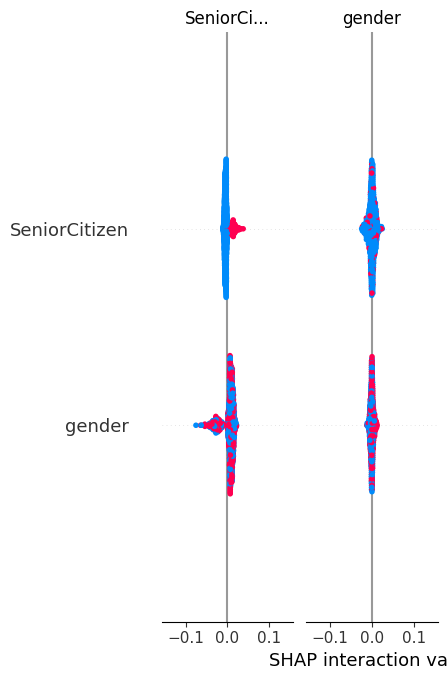

Local explanation for test instance index 0


ValueError: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (29, 2)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.

In [59]:
# =========================
# SHAP EXPLANATIONS (ALL MODELS)
# =========================
import shap
import numpy as np
import matplotlib.pyplot as plt

shap.initjs()

# pick ONE test instance to explain locally
i = 0

models = {
    "Random Forest": {
        "model": rf_best,
        "X_train": X_train,
        "X_test": X_test
    },
    "XGBoost": {
        "model": xgb_best,
        "X_train": X_train,
        "X_test": X_test
    },
    "CatBoost": {
        "model": cat_best,
        "X_train": X_train_cat,
        "X_test": X_test_cat
    }
}

for name, cfg in models.items():
    print(f"\n================ SHAP for {name} ================\n")

    model = cfg["model"]
    Xtr = cfg["X_train"]
    Xte = cfg["X_test"]

    # Background sample for speed
    bg = Xtr.sample(min(200, len(Xtr)), random_state=42)

    explainer = shap.TreeExplainer(model, data=bg)
    shap_values = explainer.shap_values(Xte)

    # Handle binary classifiers returning list
    if isinstance(shap_values, list):
        shap_values = shap_values[1]

    base_value = explainer.expected_value
    if isinstance(base_value, (list, np.ndarray)):
        base_value = base_value[1]

    # ---- Global explanation ----
    print("Global feature importance")
    shap.summary_plot(shap_values, Xte, plot_type="bar", show=True)

    # ---- Local explanation (single customer) ----
    print(f"Local explanation for test instance index {i}")
    exp = shap.Explanation(
        values=shap_values[i],
        base_values=base_value,
        data=Xte.iloc[i],
        feature_names=Xte.columns
    )
    shap.plots.waterfall(exp, max_display=12)



================ LIME for Random Forest ================



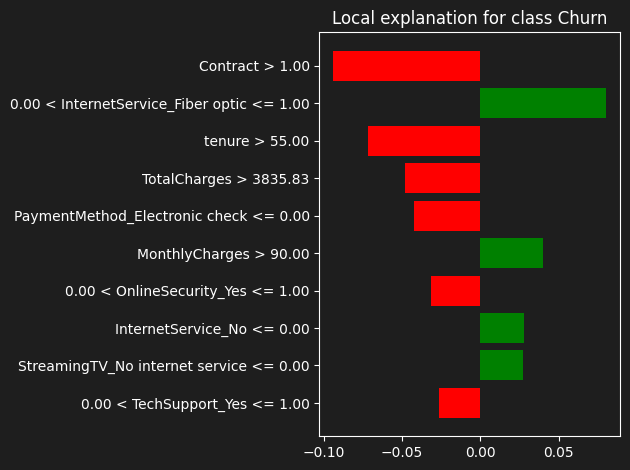

Top contributing features (LIME):
Contract > 1.00                                         -0.0940
0.00 < InternetService_Fiber optic <= 1.00              +0.0805
tenure > 55.00                                          -0.0720
TotalCharges > 3835.83                                  -0.0482
PaymentMethod_Electronic check <= 0.00                  -0.0427
MonthlyCharges > 90.00                                  +0.0398
0.00 < OnlineSecurity_Yes <= 1.00                       -0.0317
InternetService_No <= 0.00                              +0.0278
StreamingTV_No internet service <= 0.00                 +0.0274
0.00 < TechSupport_Yes <= 1.00                          -0.0262

================ LIME for XGBoost ================



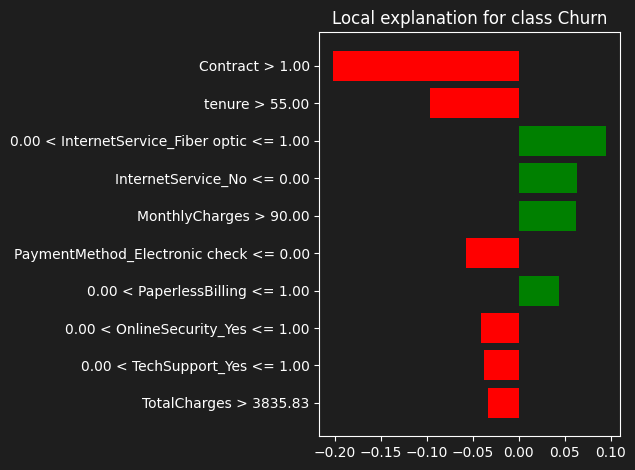

Top contributing features (LIME):
Contract > 1.00                                         -0.2015
tenure > 55.00                                          -0.0962
0.00 < InternetService_Fiber optic <= 1.00              +0.0951
InternetService_No <= 0.00                              +0.0635
MonthlyCharges > 90.00                                  +0.0628
PaymentMethod_Electronic check <= 0.00                  -0.0567
0.00 < PaperlessBilling <= 1.00                         +0.0445
0.00 < OnlineSecurity_Yes <= 1.00                       -0.0413
0.00 < TechSupport_Yes <= 1.00                          -0.0372
TotalCharges > 3835.83                                  -0.0328

================ LIME for CatBoost ================



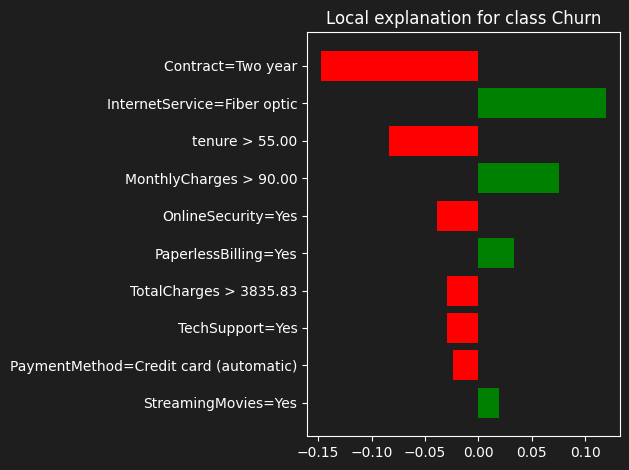

Top contributing features (LIME):
Contract=Two year                                       -0.1471
InternetService=Fiber optic                             +0.1193
tenure > 55.00                                          -0.0836
MonthlyCharges > 90.00                                  +0.0754
OnlineSecurity=Yes                                      -0.0386
PaperlessBilling=Yes                                    +0.0336
TotalCharges > 3835.83                                  -0.0296
TechSupport=Yes                                         -0.0296
PaymentMethod=Credit card (automatic)                   -0.0242
StreamingMovies=Yes                                     +0.0193


In [67]:
# =========================
# LIME EXPLANATIONS (ALL MODELS) - DARK MODE (VSCode) FRIENDLY
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer

# pick ONE test instance to explain
i = 0

# Put your already-trained best models here
models = {
    "Random Forest": {"model": rf_best,  "X_train": X_train,     "X_test": X_test,     "type": "encoded"},
    "XGBoost":       {"model": xgb_best, "X_train": X_train,     "X_test": X_test,     "type": "encoded"},
    "CatBoost":      {"model": cat_best, "X_train": X_train_cat, "X_test": X_test_cat, "type": "raw_cat"},
}

def apply_dark_mode(fig, ax):
    """Make the matplotlib LIME figure readable in VSCode dark mode."""
    bg = "#1e1e1e"
    fg = "white"
    fig.patch.set_facecolor(bg)
    ax.set_facecolor(bg)

    ax.title.set_color(fg)
    ax.xaxis.label.set_color(fg)
    ax.yaxis.label.set_color(fg)

    ax.tick_params(colors=fg)
    for spine in ax.spines.values():
        spine.set_color(fg)

    # Also recolor any text objects inside the plot
    for txt in ax.texts:
        txt.set_color(fg)

for name, cfg in models.items():
    print(f"\n================ LIME for {name} ================\n")

    model = cfg["model"]
    Xtr = cfg["X_train"].copy()
    Xte = cfg["X_test"].copy()

    feature_names = Xtr.columns.tolist()

    # ---------- Case A: Encoded models (RF / XGB) ----------
    if cfg["type"] == "encoded":
        # LIME expects numpy float matrix
        Xtr_lime = Xtr.astype(float)
        Xte_lime = Xte.astype(float)

        def predict_fn(X_array):
            X_df = pd.DataFrame(X_array, columns=feature_names)
            return model.predict_proba(X_df)

        explainer = LimeTabularExplainer(
            training_data=Xtr_lime.values,
            feature_names=feature_names,
            class_names=["No Churn", "Churn"],
            mode="classification",
            discretize_continuous=True
        )

        exp = explainer.explain_instance(
            data_row=Xte_lime.iloc[i].values,
            predict_fn=predict_fn,
            num_features=10
        )

    # ---------- Case B: CatBoost raw categorical ----------
    else:
        # Encode categorical columns into integer codes ONLY for LIME
        cat_cols = Xtr.select_dtypes(include=["object"]).columns.tolist()
        num_cols = [c for c in Xtr.columns if c not in cat_cols]

        # Build category mapping from TRAIN set
        cat_maps = {}
        for c in cat_cols:
            cats = pd.Series(Xtr[c].astype(str).fillna("MISSING")).unique().tolist()
            cat_maps[c] = cats

        def encode_df_for_lime(df):
            df2 = df.copy()
            # numeric columns to float
            for c in num_cols:
                df2[c] = pd.to_numeric(df2[c], errors="coerce").fillna(0.0).astype(float)

            # categorical columns -> integer codes
            for c in cat_cols:
                cats = cat_maps[c]
                s = df2[c].astype(str).fillna("MISSING")
                # unknowns -> "UNKNOWN"
                s = s.where(s.isin(cats), other="UNKNOWN")
                if "UNKNOWN" not in cats:
                    cat_maps[c].append("UNKNOWN")
                    cats = cat_maps[c]
                df2[c] = s.map({v: k for k, v in enumerate(cats)}).astype(int)

            return df2

        Xtr_lime = encode_df_for_lime(Xtr)
        Xte_lime = encode_df_for_lime(Xte)

        categorical_features = [feature_names.index(c) for c in cat_cols]
        categorical_names = {feature_names.index(c): cat_maps[c] for c in cat_cols}

        def predict_fn(X_array):
            # X_array is numeric-coded for LIME -> decode back to strings for CatBoost
            X_df = pd.DataFrame(X_array, columns=feature_names)

            # restore numeric columns
            for c in num_cols:
                X_df[c] = pd.to_numeric(X_df[c], errors="coerce").fillna(0.0)

            # decode categorical columns
            for c in cat_cols:
                idx_col = feature_names.index(c)
                cats = cat_maps[c]
                X_df[c] = X_df[c].round().astype(int).clip(0, len(cats)-1).map(lambda k: cats[k])

            return model.predict_proba(X_df)

        explainer = LimeTabularExplainer(
            training_data=Xtr_lime.values,
            feature_names=feature_names,
            class_names=["No Churn", "Churn"],
            mode="classification",
            discretize_continuous=True,
            categorical_features=categorical_features,
            categorical_names=categorical_names
        )

        exp = explainer.explain_instance(
            data_row=Xte_lime.iloc[i].values,
            predict_fn=predict_fn,
            num_features=10
        )

    # ----- Plot (dark-mode friendly) -----
    fig = exp.as_pyplot_figure()
    ax = fig.gca()
    apply_dark_mode(fig, ax)
    plt.tight_layout()
    plt.show()

    # ----- Also print text list (nice for reports/logs) -----
    print("Top contributing features (LIME):")
    for feat, weight in exp.as_list():
        print(f"{feat:55s} {weight:+.4f}")


Save Models

In [68]:
import joblib
import sklearn
import xgboost
import catboost
import pandas as pd

# ---- thresholds you decided ----
thresholds = {
    "Random Forest": 0.3,
    "XGBoost": 0.4,
    "CatBoost": 0.4
}

# ---- bundle everything important ----
bundle = {
    "models": {
        "rf": rf_best,
        "xgb": xgb_best,
        "cat": cat_best
    },
    "thresholds": thresholds,

    # feature schemas (VERY IMPORTANT)
    "feature_columns": {
        "encoded": list(X_train.columns),       # RF/XGB expect this exact order
        "raw": list(X_train_cat.columns)        # CatBoost expects this exact order
    },

    # CatBoost categorical indices (based on raw columns)
    "cat_features": cat_features,

    # optional: helpful info for debugging later
    "versions": {
        "sklearn": sklearn.__version__,
        "xgboost": xgboost.__version__,
        "catboost": catboost.__version__,
        "pandas": pd.__version__,
    }
}

# ---- save ----
joblib.dump(bundle, "churn_models_bundle.pkl")

print("✅ Saved: churn_models_bundle.pkl")


✅ Saved: churn_models_bundle.pkl


Load Model

In [69]:
import joblib
import pandas as pd
import numpy as np

bundle = joblib.load("churn_models_bundle.pkl")

rf  = bundle["models"]["rf"]
xgb = bundle["models"]["xgb"]
cat = bundle["models"]["cat"]

thresholds = bundle["thresholds"]
enc_cols = bundle["feature_columns"]["encoded"]
raw_cols = bundle["feature_columns"]["raw"]
cat_features = bundle["cat_features"]

print("✅ Loaded bundle. Thresholds:", thresholds)


def predict_with_threshold(model_name, X_encoded=None, X_raw=None):
    """
    model_name: 'Random Forest' | 'XGBoost' | 'CatBoost'
    Provide:
      - X_encoded (DataFrame) for RF/XGB
      - X_raw (DataFrame) for CatBoost
    Returns predicted labels (0/1) using the stored threshold.
    """
    thr = thresholds[model_name]

    if model_name in ["Random Forest", "XGBoost"]:
        if X_encoded is None:
            raise ValueError("Provide X_encoded for RF/XGB.")
        X_encoded = X_encoded.reindex(columns=enc_cols)  # enforce correct order
        proba = (rf if model_name == "Random Forest" else xgb).predict_proba(X_encoded)[:, 1]

    elif model_name == "CatBoost":
        if X_raw is None:
            raise ValueError("Provide X_raw for CatBoost.")
        X_raw = X_raw.reindex(columns=raw_cols)          # enforce correct order
        proba = cat.predict_proba(X_raw)[:, 1]

    else:
        raise ValueError("Unknown model_name.")

    preds = (proba >= thr).astype(int)
    return proba, preds

✅ Loaded bundle. Thresholds: {'Random Forest': 0.3, 'XGBoost': 0.4, 'CatBoost': 0.4}


Testing model

In [ ]:
# Example: run on your existing test sets
proba_rf,  pred_rf  = predict_with_threshold("Random Forest", X_encoded=X_test)
proba_xgb, pred_xgb = predict_with_threshold("XGBoost",      X_encoded=X_test)
proba_cat, pred_cat = predict_with_threshold("CatBoost",     X_raw=X_test_cat)

print("RF positive preds:", pred_rf.sum())
print("XGB positive preds:", pred_xgb.sum())
print("CAT positive preds:", pred_cat.sum())

RF positive preds: 548
XGB positive preds: 414
CAT positive preds: 411


In [ ]:
# Create app.py file in workspace (run this cell to write the Streamlit app)
app_code = '''
import streamlit as st
import pandas as pd
import numpy as np
import joblib

st.set_page_config(page_title="Telco Churn Predictor", layout="wide")
st.title("Telco Customer Churn — Model Playground")

@st.cache_data
def load_bundle(path="churn_models_bundle.pkl"):
    bundle = joblib.load(path)
    return bundle

try:
    bundle = load_bundle()
except Exception as e:
    st.error(f"Failed to load churn_models_bundle.pkl: {e}")
    st.stop()

models_map = {
    "Random Forest": bundle["models"]["rf"],
    "XGBoost": bundle["models"]["xgb"],
    "CatBoost": bundle["models"]["cat"],
}

thresholds = bundle.get("thresholds", {})
enc_cols = bundle["feature_columns"]["encoded"]
raw_cols = bundle["feature_columns"]["raw"]

def preprocess_raw_to_encoded(df_raw: pd.DataFrame) -> pd.DataFrame:
    df = df_raw.copy()
    binary_mapping = {"Yes": 1, "No": 0, "Male": 1, "Female": 0}
    for col in ["gender", "Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]:
        if col in df.columns:
            df[col] = df[col].map(binary_mapping).fillna(df[col])

    if "Contract" in df.columns:
        contract_mapping = {"Month-to-month": 0, "One year": 1, "Two year": 2}
        df["Contract"] = df["Contract"].map(contract_mapping).fillna(df["Contract"])

    if "TotalCharges" in df.columns:
        df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce").fillna(0)

    df_d = pd.get_dummies(df, drop_first=True)
    df_enc = df_d.reindex(columns=enc_cols, fill_value=0)
    return df_enc

def predict_with_bundle(model_name: str, X_enc: pd.DataFrame = None, X_raw: pd.DataFrame = None):
    thr = thresholds.get(model_name, 0.5)
    model = models_map[model_name]

    if model_name in ["Random Forest", "XGBoost"]:
        if X_enc is None:
            raise ValueError("Encoded DataFrame required for RF/XGB")
        X_enc = X_enc.reindex(columns=enc_cols, fill_value=0)
        proba = model.predict_proba(X_enc)[:, 1]
    else:
        if X_raw is None:
            raise ValueError("Raw DataFrame required for CatBoost")
        X_raw = X_raw.reindex(columns=raw_cols)
        proba = model.predict_proba(X_raw)[:, 1]

    preds = (proba >= thr).astype(int)
    return proba, preds

st.sidebar.header("Controls")
model_choice = st.sidebar.selectbox("Choose model", list(models_map.keys()))
mode = st.sidebar.radio("Input mode", ["Single customer", "Batch CSV upload"])

if mode == "Single customer":
    st.header("Single customer — enter features (raw)")
    with st.form(key="single_form"):
        inputs = {}
        col1, col2 = st.columns(2)
        for i, c in enumerate(raw_cols):
            widget_col = col1 if i % 2 == 0 else col2
            if any(k in c.lower() for k in ["tenure", "monthlycharges", "totalcharges"]):
                val = widget_col.number_input(c, value=0.0, format="%.2f")
                inputs[c] = val
            else:
                if c == "gender":
                    inputs[c] = widget_col.selectbox(c, ["Female", "Male"])
                elif c == "SeniorCitizen":
                    inputs[c] = widget_col.selectbox(c, ["No", "Yes"])  # 0/1 in source data
                elif c == "MultipleLines":
                    inputs[c] = widget_col.selectbox(c, ["No phone service", "No", "Yes"])
                elif c == "OnlineSecurity":
                    inputs[c] = widget_col.selectbox(c, ["No", "Yes", "No internet service"])
                elif c in ["OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]:
                    inputs[c] = widget_col.selectbox(c, ["Yes", "No", "No internet service"])
                elif c in ["Partner", "Dependents", "PhoneService", "PaperlessBilling"]:
                    inputs[c] = widget_col.selectbox(c, ["Yes", "No"])
                elif c == "Contract":
                    inputs[c] = widget_col.selectbox(c, ["Month-to-month", "One year", "Two year"])
                elif c == "InternetService":
                    inputs[c] = widget_col.selectbox(c, ["DSL", "Fiber optic", "No"])
                elif c == "PaymentMethod":
                    inputs[c] = widget_col.selectbox(c, [
                        "Electronic check",
                        "Mailed check",
                        "Bank transfer (automatic)",
                        "Credit card (automatic)",
                    ])
                else:
                    inputs[c] = widget_col.text_input(c, value="")

        submitted = st.form_submit_button("Predict")

    if submitted:
        row = pd.DataFrame([inputs], columns=raw_cols)
        try:
            if model_choice in ["Random Forest", "XGBoost"]:
                X_enc = preprocess_raw_to_encoded(row)
                proba, pred = predict_with_bundle(model_choice, X_enc=X_enc)
            else:
                proba, pred = predict_with_bundle(model_choice, X_raw=row)

            st.success(f"Predicted probability of churn: {proba[0]:.4f}")
            thr = thresholds.get(model_choice, 0.5)
            st.info(f"Threshold: {thr} → Predicted class: {int(pred[0])} (1 = churn)")
        except Exception as e:
            st.error(f"Prediction failed: {e}")

else:
    st.header("Batch CSV upload")
    st.write("Upload a CSV containing either raw columns (original dataset columns) or encoded columns used by the RF/XGB models.")
    uploaded = st.file_uploader("Upload CSV", type=["csv"]) 
    if uploaded is not None:
        df_in = pd.read_csv(uploaded)
        st.write("Preview:")
        st.dataframe(df_in.head())

        run_btn = st.button("Run predictions on uploaded file")
        if run_btn:
            try:
                if model_choice in ["Random Forest", "XGBoost"]:
                    if set(raw_cols).issubset(df_in.columns):
                        X_enc = preprocess_raw_to_encoded(df_in[raw_cols])
                    else:
                        X_enc = df_in.reindex(columns=enc_cols, fill_value=0)

                    proba, pred = predict_with_bundle(model_choice, X_enc=X_enc)
                    out = df_in.copy()
                    out["churn_proba"] = proba
                    out["churn_pred"] = pred

                else:
                    if set(raw_cols).issubset(df_in.columns):
                        X_raw = df_in[raw_cols]
                    else:
                        st.warning("Uploaded CSV doesn't contain required raw columns for CatBoost. Please upload raw-format CSV.")
                        st.stop()

                    proba, pred = predict_with_bundle(model_choice, X_raw=X_raw)
                    out = df_in.copy()
                    out["churn_proba"] = proba
                    out["churn_pred"] = pred

                st.success("Predictions complete — preview below")
                st.dataframe(out.head())

                csv = out.to_csv(index=False).encode("utf-8")
                st.download_button("Download predictions CSV", data=csv, file_name="predictions.csv", mime="text/csv")

            except Exception as e:
                st.error(f"Batch prediction failed: {e}")

st.sidebar.markdown("---")
st.sidebar.write("Bundle versions:")
for k, v in bundle.get("versions", {}).items():
    st.sidebar.write(f"{k}: {v}")
'''

with open('app.py', 'w', encoding='utf-8') as f:
    f.write(app_code)

print('Wrote app.py to workspace. Run `streamlit run app.py` to launch the app.')


Wrote app.py to workspace. Run `streamlit run app.py` to launch the app.
